# Housing Price Prediction Model

#### Step to Build Machine Learning Model 

1. Import the dataset, and remove the unwanted columns.
2. We Follow the 4 steps of machine learning workflow and satisfied the 5 Rules of modelling (before Steps: 3. ).
3. Finally We are able to predict on a new dataset that containing only the features.

Steps:<br>
    1. Extract Dataset
    2. Split the dataset into training and testing dataset
    3. Train the model on training data
    4. Test the model on testing data

Rules:
    1. Features and target should not have any null values
    2. Features should be of the type array/ dataframe.
    3. Features should be in the form of rows and columns
    4. Features should be on the same scale
    5. Features should be numeric

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.6+ KB


###### Data Cleaning Technique

In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
# remove unwanted columns
df=df.drop(['area_type','availability','society','balcony'],axis='columns')
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
# Check for NULLL value
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
# drop NULL rows
df=df.dropna()
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df.shape

(13246, 5)

In [10]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [11]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
# we have to make numerical value for size i.e eliminate BHK and Bedroom
def numer_val(x):
    return int(x.split(' ')[0])

df['BHK']=df['size'].apply(numer_val)
df.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
# check for non float value in total_sqft
def check_float(x):
    try:
        float(x)
    except:
        return False
    return True

df[~df['total_sqft'].apply(check_float)].head()

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [15]:
# change range value to average value in total_sqft columns

def conversion_to_average(x):
    l=x.split('-')
    if len(l)==2:
        return (float(l[0])+float(l[1]))/2
    try:
        return float(x)
    except:
        return None

df['total_sqft']=df['total_sqft'].apply(conversion_to_average)

In [16]:
# No Non float value in total_sqft feature.
df[~df['total_sqft'].apply(check_float)]

,location,size,total_sqft,bath,price,BHK


###### Feature Engineering Technique

In [17]:
df_new=df.copy()

In [18]:
# we add new feature as cost_per_sqft value are in rupee
# Price value in Lack
df['cost_per_sqft']=df['price']*100000/df['total_sqft']
nd=df
df.head()

,location,size,total_sqft,bath,price,BHK,cost_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [19]:
import matplotlib.pyplot as plt
nd.iloc[:,2:6].hist(figsize=(16,8))
plt.show()

<Figure size 1600x800 with 4 Axes>

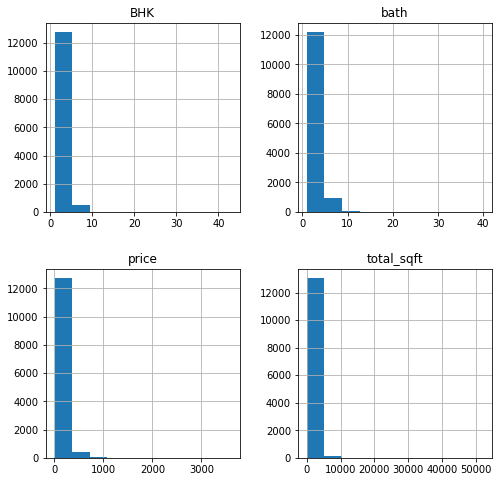

In [20]:
import matplotlib.pyplot as plt
df_new.hist(["total_sqft","bath","price","BHK"],figsize=(8,8))
plt.show()

In [21]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [22]:
# Number of unique Location
len(df.location.unique())

1304

 since if we make all unique as a column total 1300+ columns will be made so we will reduce
 our columns using Dimensionality Reduction Technique

###### Dimensionality Reduction

In [23]:
# cleaning of location data remove leading and tailing space
def remove_space(x):
    return x.strip()

df.location=df.location.apply(remove_space)

# Count of unique Location 
loc_detail=df.groupby('location')['location'].agg('count').sort_values(ascending=False)
loc_detail.head(10)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
Yelahanka                210
Uttarahalli              186
Hebbal                   176
Marathahalli             175
Raja Rajeshwari Nagar    171
Name: location, dtype: int64

To reduce number of Feature the unqiue location count less then 10 is Consider in Others columns

In [24]:
len(loc_detail[loc_detail<=10])

1052

In [25]:
loc_less_than_10=loc_detail[loc_detail<=10]
loc_less_than_10

location
BTM 1st Stage                                   10
Basapura                                        10
Sector 1 HSR Layout                             10
Naganathapura                                   10
Kalkere                                         10
Nagadevanahalli                                 10
Nagappa Reddy Layout                            10
Sadashiva Nagar                                 10
Gunjur Palya                                    10
Dairy Circle                                    10
Ganga Nagar                                     10
Dodsworth Layout                                10
1st Block Koramangala                           10
Chandra Layout                                   9
Jakkur Plantation                                9
2nd Phase JP Nagar                               9
Yemlur                                           9
Mathikere                                        9
Medahalli                                        9
Volagerekallahalli    

In [26]:
# if count<=10 we name it as Others else Nochange
def add_Name(x):
    if x in loc_less_than_10:
         return 'Others'
    else:
         return x
        
df.location=df.location.apply(add_Name)
df.head(10)

,location,size,total_sqft,bath,price,BHK,cost_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Others,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [27]:
# Number of new unique location
len(df.location.unique())

242

In [28]:
# min Area reqiure for 1BHK in banglore is >=300 sqft i.e we have to reject if area/BHK<300
df[(df.total_sqft/df.BHK)<300].head()

,location,size,total_sqft,bath,price,BHK,cost_per_sqft
9,Others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Others,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [29]:
df.shape

(13246, 7)

In [30]:
df=df[~(df.total_sqft/df.BHK<300)]
df.head()

,location,size,total_sqft,bath,price,BHK,cost_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [31]:
df.shape

(12502, 7)

In [32]:
#detail description for Price_per_square_fit
df.cost_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: cost_per_sqft, dtype: float64

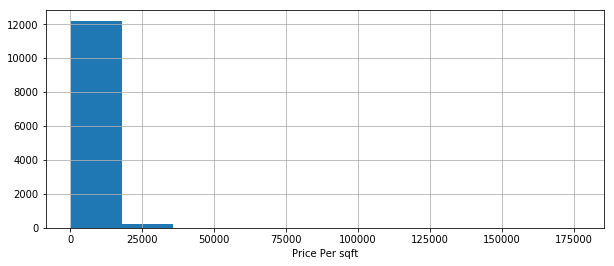

In [33]:
# before Outliner removal
import matplotlib.pyplot as plt
df.cost_per_sqft.hist(figsize=(10,4))
plt.xlabel('Price Per sqft')
plt.show()

###### Remove_cost_persqft_outlier

In [34]:
# i.e Remove_costper sqft outlier
def Remove_cost_persqft_outlier(df):
    df_out=pd.DataFrame()
    for key,df_sub in df.groupby('location'):
        m=np.mean(df_sub.cost_per_sqft)
        std=np.std(df_sub.cost_per_sqft)
        trimmed_df = df_sub[(df_sub.cost_per_sqft>(m-std)) & (df_sub.cost_per_sqft<=(m+std))]
        df_out=pd.concat([df_out,trimmed_df],ignore_index=True)
    return df_out
df=Remove_cost_persqft_outlier(df)
df.shape

(10241, 7)

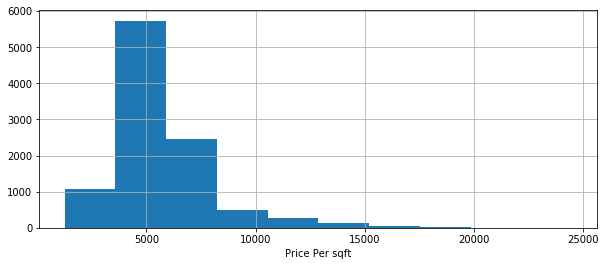

In [35]:
#After Outliner removal
import matplotlib.pyplot as plt
df.cost_per_sqft.hist(figsize=(10,4))
plt.xlabel('Price Per sqft')
plt.show()

###### remove 2 BHK appartment which Price is Less than mean cost_per_sqft

In [36]:
def remove_bhk_outlier(df):
    ind=np.array([])
    for loc,loc_df in df.groupby('location'):
        bhk_stats={}
        for BHK,bhk_df in loc_df.groupby('BHK'):
            bhk_stats[BHK]={
                 'mean':np.mean(bhk_df.cost_per_sqft),
                 'std':np.std(bhk_df.cost_per_sqft),
                 'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in loc_df.groupby('BHK'):
            stats=bhk_stats.get(BHK-1)
            if stats and stats['count']>5:
                ind=np.append(ind,bhk_df[bhk_df.cost_per_sqft<(stats['mean'])].index.values)
    return df.drop(ind,axis='index')
df = remove_bhk_outlier(df)
df.shape

(7464, 7)

###### Remove Bathroom Outlier

In [37]:
df.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

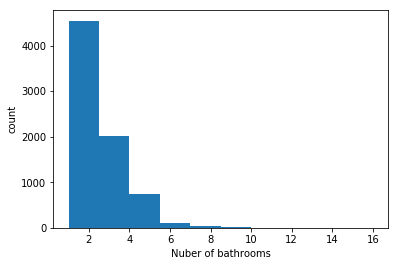

In [38]:
plt.hist(df.bath)
plt.xlabel('Nuber of bathrooms')
plt.ylabel('count')
plt.show()

 Remove that row in which Number of bathroom is greater than Bedroom beacuse that makes No sense

In [39]:
df=df[df.bath<df.BHK+2]
df.shape

(7381, 7)

In [40]:
data_frame=df
data_frame.head()

,location,size,total_sqft,bath,price,BHK,cost_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [41]:
df.head()

,location,size,total_sqft,bath,price,BHK,cost_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


After Data Cleaning Process Size Feature and cost_per_sqft Feature have no use for model building hence we drop that Columns

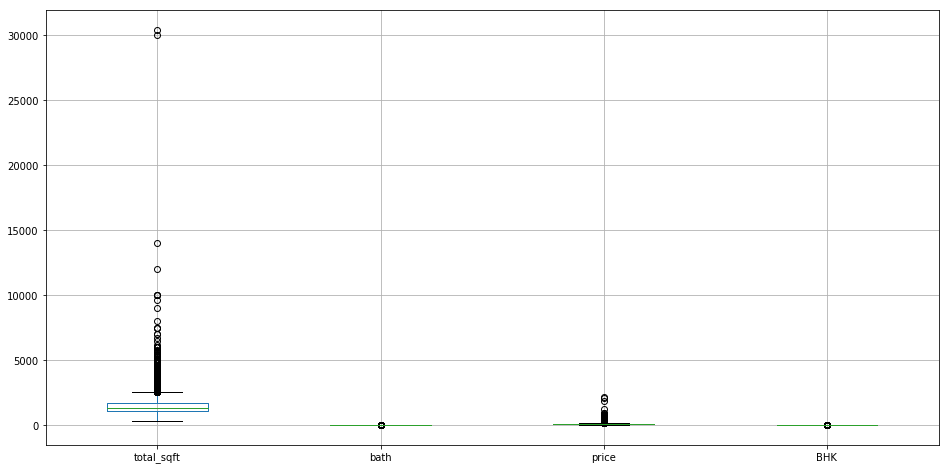

In [42]:
#DataVisualisation before scaling
data_frame.iloc[:,2:6].boxplot(figsize=(16,8))
plt.show()

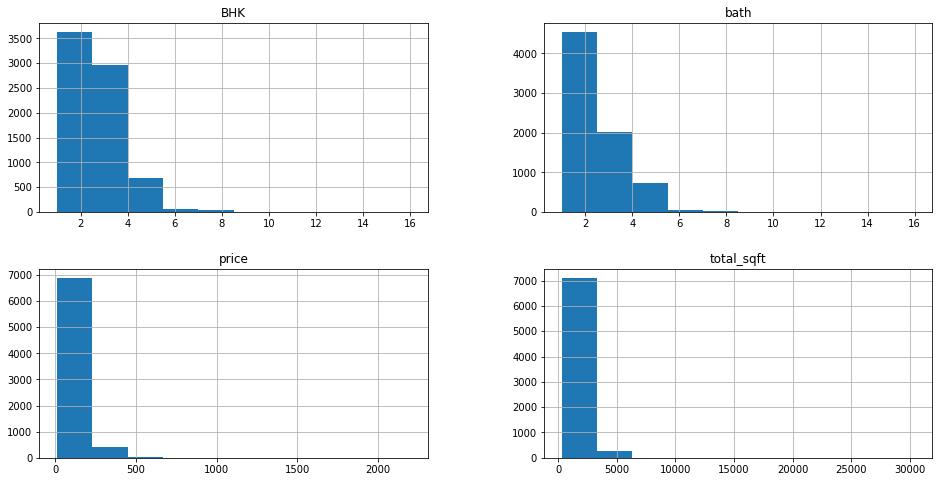

In [43]:
data_frame.iloc[:,2:6].hist(figsize=(16,8))
plt.show()

In [44]:
df=df.drop(['size','cost_per_sqft'],axis='columns')
df.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [45]:
df.shape

(7381, 5)

###### Convert Categorical/String in Location to Numerical Value By Encoding Technique

In [46]:
dummies=pd.get_dummies(df.location)
df.shape

(7381, 5)

In [47]:
df=pd.concat([df,dummies.drop('Others',axis='columns')],axis='columns')

In [48]:
df.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df=df.drop('location',axis='columns')
df.head(2)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df.shape

(7381, 245)

In [51]:
df.columns

Index(['total_sqft', 'bath', 'price', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=245)

###### Spliting of Dataset into Training and Testing Dataset

In [52]:
y=df.price  #Target dataset
new_df=df
x=df.drop('price',axis='columns')   #feature Dataset
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

D:\anoconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\anoconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\anoconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


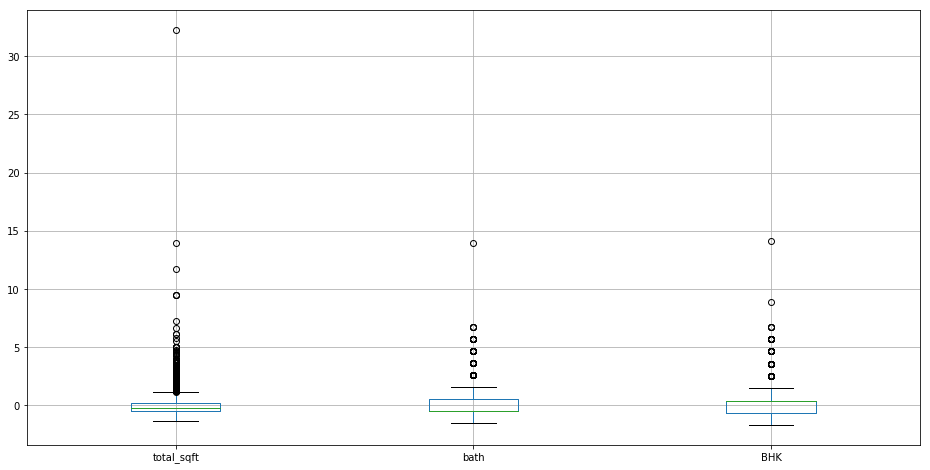

In [55]:
#Data Visualisation After Scaling 
train=pd.DataFrame(x_train,columns=x.columns)
test=pd.DataFrame(x_test,columns=x.columns)
train.iloc[:,0:3].boxplot(figsize=(16,8))
plt.show()

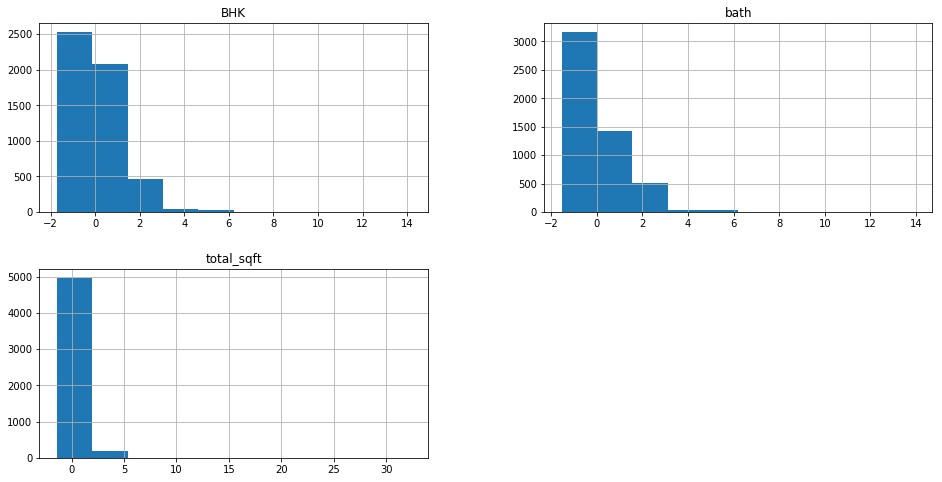

In [56]:
train.iloc[:,0:3].hist(figsize=(16,8))
plt.show()

##### Apply Machine Learning Algorithm to build a Model

###### 1. Linear Regression Technique

In [57]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
LR.score(x_test,y_test)


0.8519855000059814

In [58]:
# Ridge Linear Model
from sklearn.linear_model import Ridge
rid_model=Ridge(alpha=0.5)
rid_model.fit(x_train,y_train)
rid_model.score(x_test,y_test)

0.8519893177837401

In [59]:
# Lasso Linear model
from sklearn.linear_model import Lasso
Lasso_model=Lasso(alpha=0.1)
Lasso_model.fit(x_train,y_train)
Lasso_model.score(x_test,y_test)

0.8517661150410745

###### 2.Polynomial Regression Technique

In [60]:
# Time consuming Process
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# poly=PolynomialFeatures(degree=2)
# x_poly=poly.fit_transform(x_train)
# x_test_poly=poly.fit_transform(x_test)
# LR_new=LinearRegression()
# LR_new.fit(x_poly,y_train)
# LR_new.score(x_test_poly,y_test)

     Accuracy:  -1.3745739567507077e+22

###### 3. Support Vector Machine Regression Technique

In [61]:
from sklearn.svm import SVR  
r=SVR()
r.fit(x_train,y_train)
r.score(x_test,y_test)

0.13387428699821735

###### Best Model Section Technique Using GridSearch Method

In [62]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR  
def Best_model_Selection(x,y):
    Algorithm = {
              'linear_regression': {
                   'model':LinearRegression(),
                   'params':{
                       'normalize':[True,False]
                   }
                },
              'lasso':{
                    'model':Lasso(),
                    'params':{
                        'alpha':[1,2],
                        'selection':['random','cyclic']
                    }
                },
              'Ridge':{
                     'model':Ridge(),
                    'params':{
                        'alpha':[1,2]
                    }
                },
               'SVM':{
                     'model':SVR(),
                     'params':{
                          'C': [1], 
                          'gamma': [1],
                          'kernel': ['rbf']
                     }
                },
                'Decision_tree':{
                      'model':DecisionTreeRegressor(),
                      'params':{
                          'criterion':['mse','friedman_mse'],
                          'splitter':['best','random']
                      }
                },
                'RandomForestRegressor':{
                      'model':RandomForestRegressor(),
                      'params' :{
                            'n_estimators': [25,45,50,100]
                        }
                },
                'XGBoost':{
                    'model':XGBRegressor(),
                    'params':{
                           'learning_rate': [1,2,3],
                           'n_estimators': [25,50,100]
                    }
                }        
             }
    score = []
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in Algorithm.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        score.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_parameter':gs.best_params_
        })
    return pd.DataFrame(score,columns=['model','best_score','best_parameter'])
    
Best_model_Selection(x,y)      

##### since from all model Linear Regression Technique have high Accuracy hence we use for model Development

In [63]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=.3,random_state=10)
cross_val_score(LR,x,y,cv=cv)

array([0.8519855 , 0.79513546, 0.81481825, 0.84215598, 0.78615433])

In [64]:
cross_val_score(LR,x,y,cv=cv).mean()

0.8180499035347794

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
predictions=LR.predict(x_test)
print ('MSE is :  ', mean_squared_error(predictions,y_test))
print("r2_Score : ",r2_score(predictions,y_test))
print ("MAE is  :  ", mean_absolute_error(predictions,y_test))

MSE is :   1253.9374829934504
r2_Score :  0.8311417221162207
MAE is  :   19.814276268120686


In [66]:
x.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

###### Function to Predicat Estimated Price

In [67]:
def Estimated_price(location,sqft,bathroom,BHK):
    loc_index=np.where(x.columns==location)[0][0]
    p=np.zeros(len(x.columns))
    p[0]=sqft
    p[1]=bathroom
    p[2]=BHK
    if loc_index>=0:
         p[loc_index]=1
    ppp=p.reshape(1,244)
    data=pd.DataFrame(ppp)
    data=scaler.transform(data)
    price=LR.predict(data)
    return str(price)+" Lakhs"+" Only"

In [68]:
Estimated_price("2nd Phase Judicial Layout",1000,2,2)

'[29.51392195] Lakhs Only'

In [69]:
Estimated_price("1st Block Jayanagar",1850,10,10)

'[289.59781152] Lakhs Only'

In [70]:
import pickle
with open('Housing_Price_Prediction.pickle','wb') as file:
    pickle.dump(LR,file)

In [71]:
import json
columns={
    'data_columns':[feature.lower() for feature in x.columns]
}
with open('feature.json','w') as file:
    file.write(json.dumps(columns))